Importação da Biblioteca classification_report: A função classification_report da biblioteca sklearn.metrics é utilizada para calcular as métricas F1-score, precisão (precision) e revocação (recall).

Previsões (y_pred): Após o treinamento, fazemos previsões sobre o conjunto de teste usando o método predict. Como as saídas do modelo são probabilidades, utilizamos argmax(axis=1) para converter essas probabilidades nas classes previstas.

Relatório de Classificação: O relatório de classificação é gerado para fornecer as métricas F1-score, precisão e revocação para cada classe, além de uma média ponderada.

Saída Esperada
Após executar o código, você verá a acurácia nos dados de teste e, em seguida, o relatório de classificação, que inclui:

Precision: A precisão das previsões para cada classe.
Recall: A capacidade do modelo de capturar todas as instâncias de cada classe.
F1-score: A média harmônica entre precisão e revocação.

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Carregar os dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar os dados para valores entre 0 e 1
X_train = X_train / 256.0
X_test = X_test / 256.0

# Adicionar a dimensão do canal
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Converter as etiquetas em formato one-hot
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

In [21]:
# Criar o gerador de dados para aumento de dados
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(X_train)

In [23]:
# Criar o modelo
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Ajuste a forma de entrada
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adiciona Dropout com taxa de 50%
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Adiciona Dropout com taxa de 50%
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Treinar o modelo com aumento de dados
history = model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=32),
                    epochs=20,
                    validation_data=(X_test, y_test_one_hot),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

# Avaliar o modelo nos dados de teste
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print(f'\nAcurácia nos dados de teste: {test_acc}')

# Fazer previsões
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Gerar relatório de classificação
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_classes, digits=4))


Epoch 1/20
   6/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8106 - loss: 0.5127  

c:\Users\Carlos Carneiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8629 - loss: 0.4489 - val_accuracy: 0.9641 - val_loss: 0.1208
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8647 - loss: 0.4480 - val_accuracy: 0.9633 - val_loss: 0.1231
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8651 - loss: 0.4427 - val_accuracy: 0.9649 - val_loss: 0.1201
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8700 - loss: 0.4282 - val_accuracy: 0.9658 - val_loss: 0.1131
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8731 - loss: 0.4207 - val_accuracy: 0.9692 - val_loss: 0.1108
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8725 - loss: 0.4249 - val_accuracy: 0.9673 - val_loss: 0.1141
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8738 - loss: 0.4142 - val_accuracy: 0.9665 - val_loss: 0.1133
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8737 - loss: 0.42

In [28]:
import pandas as pd

# Criar tabela com os valores de acurácia e erro para cada época
df_history = pd.DataFrame({
    'Época': range(1, len(history.history['loss']) + 1),
    'Erro de Treinamento': history.history['loss'],
    'Erro de Validação': history.history['val_loss'],
    'Acurácia de Treinamento': history.history['accuracy'],
    'Acurácia de Validação': history.history['val_accuracy']
})

print("\nTabela de Acurácia e Erro por Época:")
print(df_history)


Tabela de Acurácia e Erro por Época:
   Época  Erro de Treinamento  Erro de Validação  Acurácia de Treinamento  \
0      1             0.445968           0.120805                 0.864850   
1      2             0.442401           0.123148                 0.867500   
2      3             0.436769           0.120084                 0.866200   
3      4             0.428483           0.113114                 0.869483   
4      5             0.420996           0.110791                 0.871667   
5      6             0.420504           0.114104                 0.872450   
6      7             0.409887           0.113331                 0.875517   
7      8             0.418061           0.113472                 0.874033   

   Acurácia de Validação  
0                 0.9641  
1                 0.9633  
2                 0.9649  
3                 0.9658  
4                 0.9692  
5                 0.9673  
6                 0.9665  
7                 0.9676  


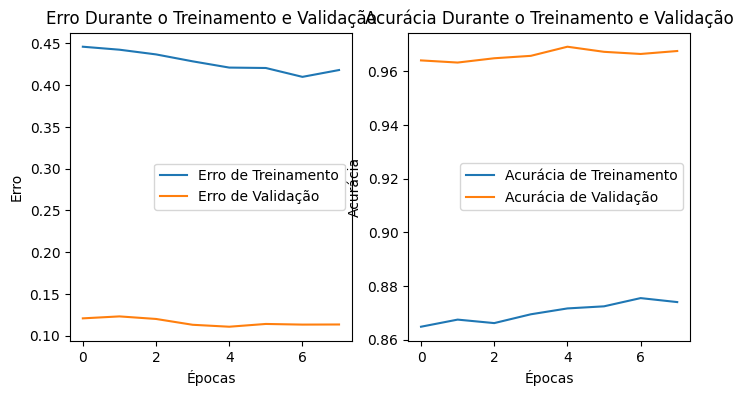

In [29]:
# Plotar gráficos de erro e acurácia
plt.figure(figsize=(8, 4))

# Gráfico de erro (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.title('Erro Durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()

# Gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia Durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


plt.show()

- Overfitting:
Erro de Treinamento: O erro de treinamento está diminuindo ao longo das épocas, o que é esperado.
Erro de Validação: O erro de validação também está diminuindo, mas há algumas variações. O erro de validação é consistentemente mais baixo do que o erro de treinamento, o que pode indicar que o modelo está se ajustando bem aos dados de validação.

- Underfitting:
Acurácia de Treinamento e Validação: A acurácia de treinamento e validação está bastante próxima uma da outra, e ambas são altas. Isso sugere que o modelo está bem ajustado tanto aos dados de treinamento quanto aos dados de validação, sem sinais claros de underfitting.

- Análise:
O Erro de Validação está consistentemente menor do que o Erro de Treinamento: Normalmente, isso não é um sinal típico de overfitting. O overfitting geralmente se manifesta como um erro de treinamento muito baixo com um erro de validação mais alto.
Acurácia de Validação é alta e estável: A acurácia de validação está alta e não mostra uma tendência de diminuir, o que também não é típico de overfitting.

- Com base nos dados apresentados, o modelo não parece estar sofrendo de overfitting ou underfitting. O modelo está alcançando uma boa acurácia e o erro de validação está bem controlado. O comportamento dos erros e acurácia sugere que o modelo está generalizando bem para os dados de validação e não há sinais evidentes de overfitting.